# **Sarcasm Detection in Tweets to Reduce Misinformation**

  **Business Problem:**
  
  Sarcasm is a common linguistic tool on social media, often used to convey humor or criticism. However, its subtle nature makes it easily misinterpreted, especially by automated systems. When sarcastic tweets spread false information, it becomes difficult to distinguish between genuine news and fabricated content. This leads to the rapid dissemination of misinformation, impacting public opinion and decision-making.

**Solution Description:**

Developing accurate sarcasm detection technology can help mitigate the spread of misinformation due to tweets. This technology can be integrated into social media platforms to flag potentially sarcastic content, allowing users to interpret information correctly.


**Dataset Description:**

This dataset contains a collection of tweets with corresponding labels indicating whether the tweet is sarcastic (yes) or not sarcastic (no). The dataset aims to facilitate research and development of models capable of accurately detecting sarcasm in text-based content.

**Data Format:**

*   Tweet: The text content of the tweet.
*   Sarcasm: A label (yes or no) indicating sarcasm (yes) or non-sarcasm (no).


**Data Visualization:**

The dataset used for this sarcasm detection model comprises 6,930 Tweets.

*   yes - 3633
*   no - 3297

There are 3633 sarcastic tweets and 3297 non-sarcastic tweets in the dataset.


*  **Train, Test and Validation test data size:**




Train size: 4435

Test size: 1386

Validation size: 1109

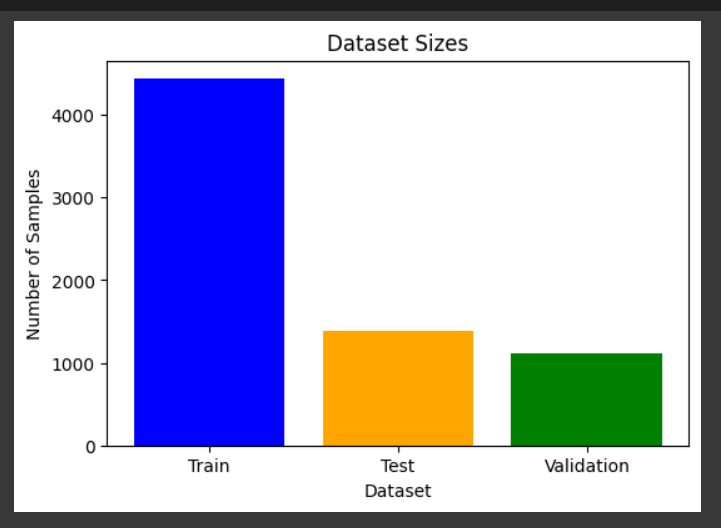






*   **Label wise split in train data**




Sarcastic -   2316

non-sarcastic -   2119

There are 2316 sarcastic rows and 2119 non-sarcatic rows in training dataset.

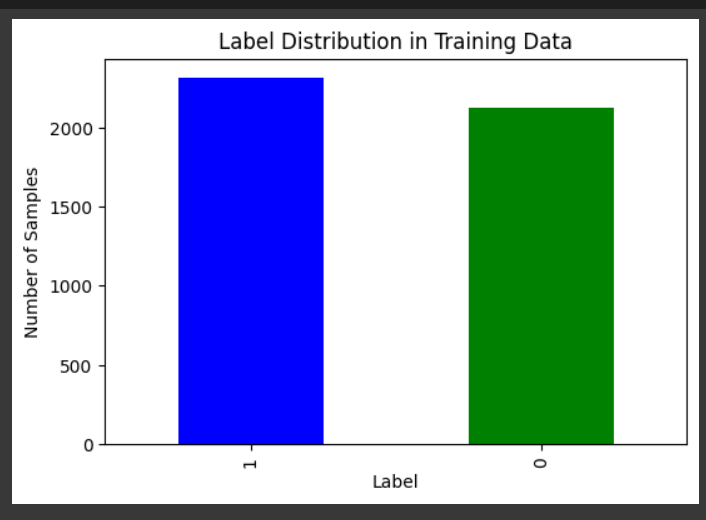

**Model Architecture:**

The sarcasm detection  model cantain different layers which are listed below:

1) **Embedding Layer:** This layer converts words from the text into numerical vectors (embeddings) of a specific dimension.It has vocab size of 10k and embedding dim as 512.

2) **Bidirectional LSTMs (x3):** The model stacks three Bidirectional LSTMs. Each LSTM layer has a specific number of units (512, 328, 128). Bidirectional LSTMs process the text in both directions (forward and backward) to capture context better. The return_sequences=True argument ensures the output of each layer is a sequence of vectors, one for each word.

3) **Final LSTM:** Another Bidirectional LSTM with 128 units processes the outputs from the previous layers. This time, return_sequences=False as we want a single output vector representing the entire sentence.

4) **Dense Layers:** The model adds three fully connected (dense) layers. The first two layers with 128 and 64 units respectively use a ReLU activation function. These layers learn non-linear relationships between the features.

5) **Output Layer:** The final dense layer has one unit and uses a sigmoid activation function.

Overall, this model utilizes multiple LSTMs to capture long-range dependencies in text data and dense layers to learn complex classification patterns.

**Training Configuration**

**Early Stopping**: Implemented to monitor validation loss and stop training if it does not improve for 3 consecutive epochs, restoring the best model weights.

**Loss Function**: Binary cross-entropy.

**Optimizer**: Adam optimizer.

**Metrics**: Accuracy.

**Model Training and Evaluation**
The model is trained for 10 epochs with a batch size of 256.

**Confusion Matrix and Classification Report of Best model:**

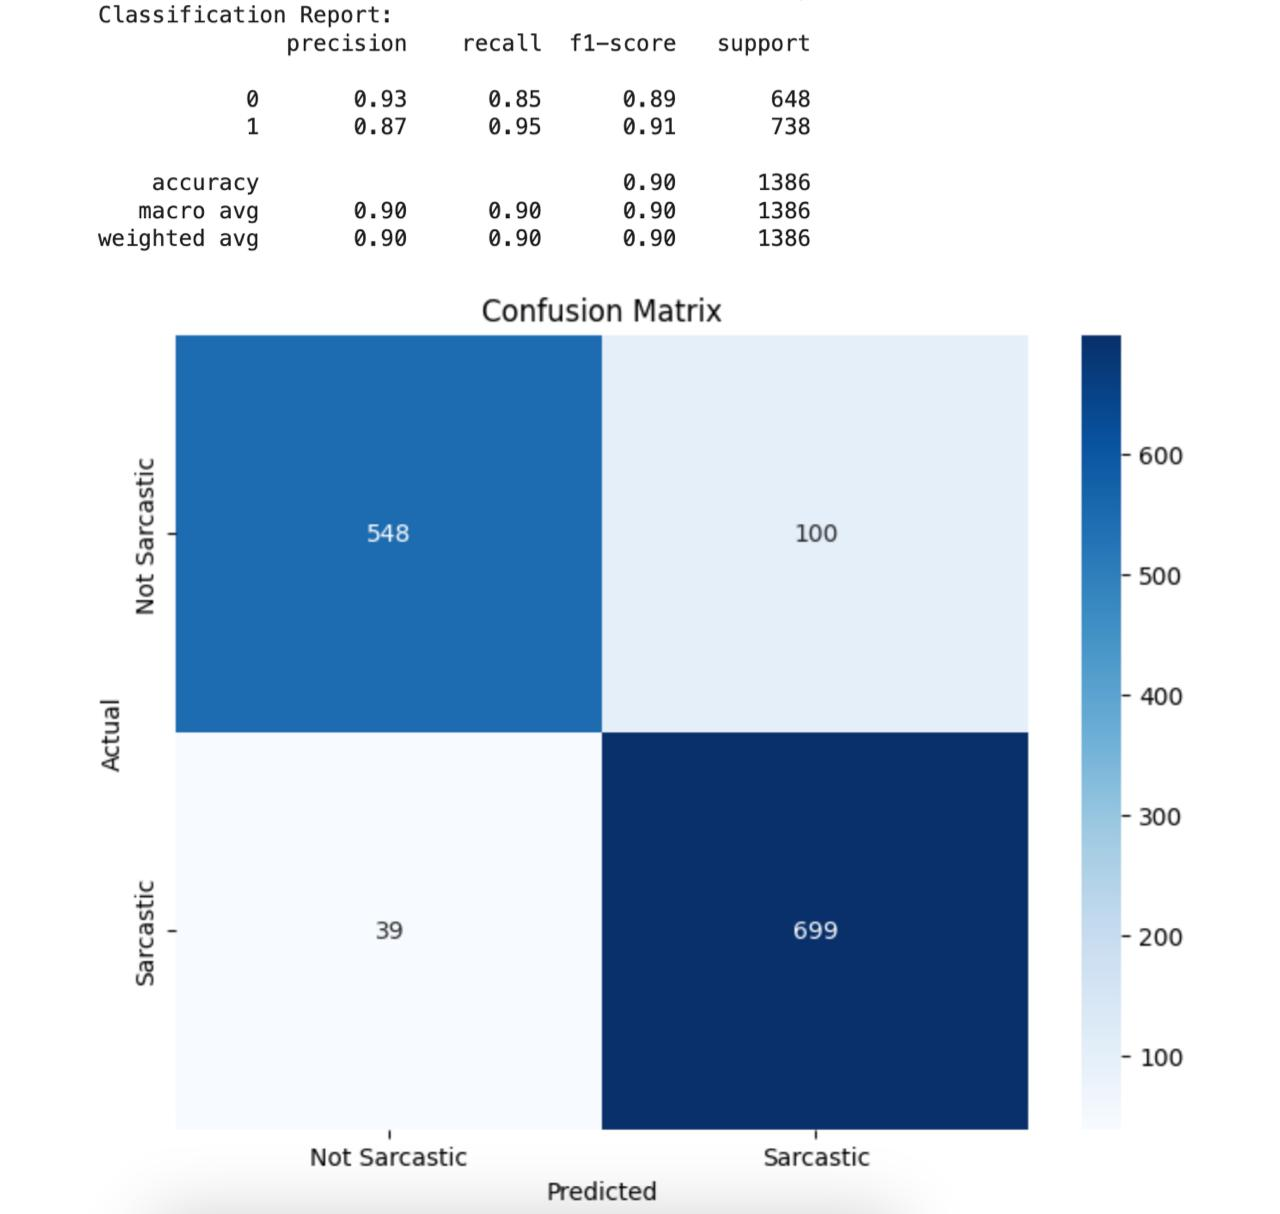


**Code that takes a sample of 3 or 4 texts as input and prints the prediction beside the text:**.



In [9]:
import pandas as pd
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pickle

In [12]:
# Define parameters
max_len = 100

# Load the model
model = load_model('final_model.h5')


In [18]:
# Load the tokenizer
with open('tokenizer.pkl', 'rb') as f:
    tokenizer = pickle.load(f)

In [13]:
# Define the function to predict sarcasm
def predict_sarcasm(text):
    sequence = tokenizer.texts_to_sequences([text])
    padded_sequence = pad_sequences(sequence, maxlen=max_len)
    prediction = model.predict(padded_sequence)
    if prediction > 0.5:
        return "This text is predicted to be sarcastic."
    else:
        return "This text is predicted to be non-sarcastic."


**Example Tweets:**

In [19]:
new_text = "Can't wait to crush my to-do list ,tomorrow."
result = predict_sarcasm(new_text)
print(new_text)
print(result)

1/1 [==============================] - 4s 4s/step
Can't wait to crush my to-do list ,tomorrow.
This text is predicted to be sarcastic.


In [34]:
new_text = "can i also come with you."
result = predict_sarcasm(new_text)
print(new_text)
print(result)

1/1 [==============================] - 0s 29ms/step
can i also come with you.
This text is predicted to be non-sarcastic.


In [46]:
new_text = "A sunny day always lifts my spirits"
result = predict_sarcasm(new_text)
print(new_text)
print(result)

1/1 [==============================] - 0s 29ms/step
A sunny day always lifts my spirits
This text is predicted to be non-sarcastic.


In [24]:
new_text = "Love when the internet goes out right when I need it most."
result = predict_sarcasm(new_text)
print(new_text)
print(result)

1/1 [==============================] - 0s 29ms/step
Love when the internet goes out right when I need it most.
This text is predicted to be sarcastic.


In [25]:
new_text = "So excited to see my friends tonight!"
result = predict_sarcasm(new_text)
print(new_text)
print(result)

1/1 [==============================] - 0s 45ms/step
So excited to see my friends tonight!
This text is predicted to be non-sarcastic.


In [27]:
new_text = "My bank account is thriving after that shopping spree. "
result = predict_sarcasm(new_text)
print(new_text)
print(result)

1/1 [==============================] - 0s 29ms/step
My bank account is thriving after that shopping spree. 
This text is predicted to be sarcastic.


In [28]:
new_text = "Can't wait for another Monday to brighten my week."
result = predict_sarcasm(new_text)
print(new_text)
print(result)

1/1 [==============================] - 0s 31ms/step
Can't wait for another Monday to brighten my week.
This text is predicted to be sarcastic.


# Conclusion


*   Data Loading and Preprocessing:

   Loaded the dataset and displayed basic information.

   Cleaned the data by removing @,# and URLs and also emojis.

   Encoded and Tokenized the labels.


*   Training and Evaluating the Model:

    We tried various Machine Learning and Deep learning Models and found Bidirectional Long Short-Term Memory (BLSTM) to have the best performance.

    Displayed the classification report and confusion matrix.
    
    Tested the model with a set of new random tweets and displayed the results(for both sarcastic and non sarcastic).
